# $B3$: Less Than Oracle I

## Problem Statement
You are given integers $n$ and $L$. Implement the oracle $O$ on a quantum circuit $qc$ with $n$ qubits, which multiplies all the probability amplitudes $a_i$ of 
$\lvert 0 \rangle, \lvert 1 \rangle, \dots, \lvert L-1 \rangle$  by $-1$.

### Constraints
- $1 \leq n \leq 5$
- $1 \leq L \leq 2^n$
- Global phase is ignored in judgment.
- Integers must be encoded in little-endian format.

## Sample Input
For $n = 2$, $L = 3$, the initial state is:

$$
\frac{1}{\sqrt{4}} ( \lvert 00 \rangle + \lvert 10 \rangle + \lvert 01 \rangle + \lvert 11 \rangle ).
$$

The implemented oracle $O$ should apply the transformation:

$$
\frac{1}{\sqrt{4}} ( \lvert 00 \rangle + \lvert 10 \rangle + \lvert 01 \rangle + \lvert 11 \rangle ) \xrightarrow{O} \frac{1}{\sqrt{4}} ( -\lvert 00 \rangle - \lvert 10 \rangle - \lvert 01 \rangle + \lvert 11 \rangle ).
$$


In [166]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate

def solve(n: int, L: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    
    #----------------------------------
    for k in range(n):   #remove this part while submitting
        qc.h(k)
    #----------------------------------- 
    
    for i in range(L):
        # Convert index to n-bit binary (big-endian)
        binary_repr = format(i, f'0{n}b')  
        little_endian_binary_repr = binary_repr[::-1]  # Convert to little-endian

        # Apply X gates when state = 0
        for j in range(n):
            if little_endian_binary_repr[j] == '0':
                qc.x(j)

        # Apply multi-controlled Z gate
        if n == 1:
            qc.z(0)  # Directly apply Z if there's only one qubit
        else:
            qc.append(ZGate().control(n - 1), range(n))

        # Reset X gates for the next iteration
        for j in range(n):
            if little_endian_binary_repr[j] == '0':
                qc.x(j)
    
    return qc

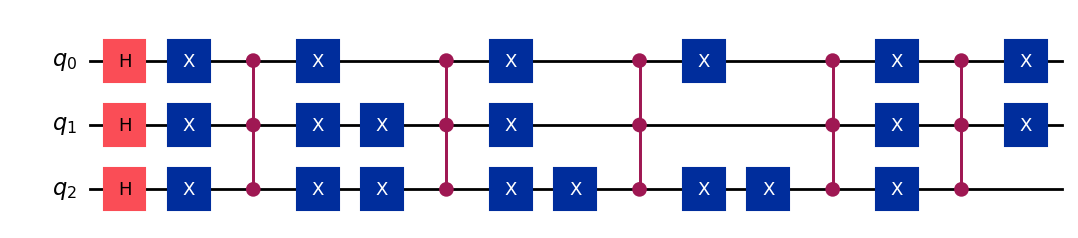

In [167]:
qc = solve(3,5)

qc.draw('mpl')

In [168]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach

The goal of this oracle $O$ is to multiply the probability amplitudes of computational basis states $\lvert x \rangle$ for all $x < L$ by $-1$. This is achieved by applying a multi-controlled $Z$ gate to these states. Below is a step-by-step breakdown of the implementation:

### 1. **Quantum Circuit Initialization**
- A quantum circuit `qc` is created with $n$ qubits, which will be used to represent the integer states.

### 2. **Iterate Over Integers from $0$ to $L-1$**
- We iterate over all integers $i$ from $0$ to $L-1$. Each integer corresponds to a computational basis state $\lvert x \rangle$.

### 3. **Convert the Integer to Binary Representation**
- Each integer $i$ is converted to its $n$-bit binary representation.
- In classical computing, numbers are typically represented in **big-endian** format, where the leftmost bit is the most significant bit (MSB) and the rightmost bit is the least significant bit (LSB).
- However, quantum circuits follow the **little-endian** convention, where the rightmost qubit (qubit 0) represents the MSB and the leftmost qubit (qubit $n-1$) represents the LSB.
- To match this convention, we **reverse the binary string**.

### 4. **Apply X Gates to Encode the Condition**
- To ensure that the oracle acts only on the state $\lvert x \rangle$, we prepare the qubits:
  - For every bit in the binary representation that is `0`, we apply an $X$ gate to flip it to `1`.
  - This ensures that when we apply the multi-controlled $Z$ gate, it is activated only when all qubits are in the `1` state.

### 5. **Apply the Multi-Controlled Z Gate**
- The multi-controlled $Z$ gate is applied to introduce the phase shift $-1$ for the selected state.
- If $n = 1$, a single $Z$ gate is applied directly.
- If $n > 1$, an $(n-1)$-controlled $Z$ gate is used to apply the phase flip only when all qubits are in the `1` state.

### 6. **Undo the X Gates to Restore the Original Basis**
- After applying the multi-controlled $Z$ gate, we revert the $X$ gates to restore the original computational basis.

### **Why is Little-Endian Important?**
- In Qiskit, qubits are indexed from right to left (little-endian), meaning that the **rightmost** qubit in the quantum circuit corresponds to the leftmost bit in classical notation.
- If we used the default big-endian representation, the quantum operations would be applied to the wrong qubits.
- To correctly represent the integer states in the quantum circuit, we must **reverse the bit order** before applying operations.

### **Summary**
- Convert the integer $i$ to an $n$-bit binary representation and reverse it to match little-endian ordering.
- Apply $X$ gates to transform `0`s into `1`s.
- Apply a multi-controlled $Z$ gate to introduce the phase flip.
- Undo the $X$ gates to restore the original state.

This ensures that all basis states $\lvert x \rangle$ for $x < L$ receive a phase flip while leaving the other states unchanged.
